# 3D Relationship Testing

Testing relationships between 3D structures defined using contours on multiple slices.


In [1]:
# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from structure_slice import *
from structure_set import *
from relations import *

### Global Settings

In [2]:
PRECISION = 2

In [3]:
%matplotlib inline

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Contains

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Contains</th><th>Transitive</th></tr>
<td class="d" colspan="2">
All points of <span class="b">b</span> lie in the interior of <span class="a">a</span>, no points of <span class="b">b</span> lie in the exterior of <span class="a">a</span>, some points in <span class="a">a</span> are exterior to <span class="b">b</span>, and the boundaries of <span class="a">a</span> and <span class="b">b</span> do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/contains simple.png" alt="Contains">
<img src="Images/Relationships/contains with hole.png" alt="Contains With Hole">
</td></tr>
</table></td></tr></table>

### Contains

#### Embedded Spheres
![Embedded Spheres](<Images/FreeCAD Images/Embedded Spheres.png>)

In [4]:
def embedded_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes
    sphere6 = make_sphere(roi_num=1, radius=3, spacing=slice_spacing)
    sphere3 = make_sphere(roi_num=2, radius=1.5, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([sphere6, sphere3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [5]:
slice_table = embedded_spheres_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Concentric Cylinders
![Concentric cylinders](<Images/FreeCAD Images/Concentric cylinders.png>)

In [6]:
def simple_cylinders_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.0,
                                  offset_z=0,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder within primary
    contained_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=0.6,
                                                offset_x=0, offset_z=0,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, contained_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [7]:
slice_table = simple_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]

relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Embedded Boxes
![Embedded Boxes](<Images/FreeCAD Images/Embedded Boxes.png>)

In [8]:
def embedded_boxes_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3 = make_box(roi_num=2, width=3, offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([cube6, cube3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [9]:
slice_table = embedded_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Parallel Cylinders
- Concentric cylinders with interior cylinder ending inside the exterior cylinder by one slice

![Parallel Cylinders](<Images/FreeCAD Images/Parallel Cylinders.png>)

In [10]:
def parallel_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10, offset_z=0,
                                  spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                   length=6,
                                                   offset_x=2.5, offset_z=0,
                                                   spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, left_cylinder, right_cylinder,
                            right_middle_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [11]:
slice_table = parallel_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Sphere in Sphere in Sphere
- Hollow spheres with an inner sphere and second structure inside the inner sphere.

![Sphere in Sphere in Sphere](<Images/FreeCAD Images/Sphere in Spheres in Shell.png>)

In [12]:
def nested_spheres_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, sphere12, hole10, sphere8, sphere6])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [13]:
slice_table = nested_spheres_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


## Surrounds

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>


#### Simple Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Simple Surrounded Cylinders](<Images/FreeCAD Images/Surrounded cylinders.png>)

In [14]:
def surrounded_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [15]:
slice_table = surrounded_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Horizontal Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Horizontal Cylinders](<Images/FreeCAD Images/Horizontal Surrounded cylinders.png>)

In [16]:
def surrounded_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [17]:
slice_table = surrounded_horizontal_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Sphere in Shell
- Hollow sphere with the second structure as an inner sphere.

![Sphere in Shell](<Images/FreeCAD Images/Sphere in Shell.png>)

In [18]:
def sphere_in_shell_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, sphere12, hole10, sphere6])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [19]:
slice_table = sphere_in_shell_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Sphere in Cylinder in Box
![alt text](<Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [20]:
def sphere_in_cylinders_in_box_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=10, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, left_cylinder, right_cylinder,
                            right_sphere])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [21]:
slice_table = sphere_in_cylinders_in_box_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


## Shelters
<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Shelters</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>

- Surrounds geometry with hole opened to exterior


#### Horizontal Sheltered Cylinder
- Cylindrical shell with an interior cylinder ending inside the outer cylinder

![Sheltered Horizontal cylinder](<Images/FreeCAD Images/Sheltered Horizontal cylinder.png>)

In [22]:
def shelters_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


**Currently identified as _Disjoint_**

In [24]:
slice_table = shelters_horizontal_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SHELTERS

Relationship: Disjoint


#### Simple Sheltered Vertical Cylinder
- Hollow cylindrical shell with an interior cylinder ending inside the shell

![Sheltered cylinder](<Images/FreeCAD Images/Sheltered cylinder.png>)

In [22]:
def shelters_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


**Currently identified as _Surrounds_**

In [23]:
slice_table = shelters_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SHELTERS

Relationship: Surrounds


#### Sphere in Cylinder in Box
![alt text](<Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [38]:
def sphere_in_cylinders_in_box_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=12, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=8, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, left_cylinder, right_cylinder,
                            right_sphere])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

**Currently identified as _Surrounds_**

In [39]:
slice_table = sphere_in_cylinders_in_box_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Surrounds


## Disjoint

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/disjoint.png" alt="Disjoint" style="width: 200px">
</td></tr></table>

#### Disjoint Boxes
![Disjoint Boxes](<Images/FreeCAD Images/Disjoint Boxes.png>)

In [27]:
def disjoint_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-3,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=3,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([left_cube, right_cube, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [28]:
slice_table = disjoint_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Extended Inner Cylinder
- Concentric hollow cylinder with an interior cylinder extending beyond the outer cylinder's hole by one slice

![Extended Inner Cylinder](<Images/FreeCAD Images/Extended Inner cylinder.png>)

In [31]:
def extended_inner_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=12,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            inner_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [ ]:
slice_table = extended_inner_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Surrounds


#### Disjoint Parallel Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is parallel, but **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure.

![Disjoint Parallel Cylinders](<Images/FreeCAD Images/Disjoint Parallel Cylinders.png>)

In [35]:
def parallel_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=25, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_x=10, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            inner_cylinder, disjoint_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [36]:
slice_table = extended_inner_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Surrounds


#### Disjoint Axial Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is on the same axis as the first, but above, making it **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure.

![Disjoint Parallel Cylinders](<Images/FreeCAD Images/Disjoint Axial Cylinders.png>)

In [37]:
def axial_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=30, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_z=12, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            inner_cylinder, disjoint_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [ ]:
slice_table = extended_inner_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Surrounds


# Done to Here

## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/borders.png" alt="Borders">
<img src="Images/Relationships/Concave Borders.png" alt="Concave Borders">
</td></tr></table>

Relationship      Region Test   Exterior Test   Hull Test
Borders           FF*FT****     FF*FT****
        

**Boundaries**
- Simple Box boundary on X
- Simple Box boundary on Z
- 2 regions with boundaries on +Y and -Y
- 2 regions with boundaries on +Z and -Z
- 2 regions with boundaries on +X and -Z
- 2 regions one with boundaries on +Z and one disjoint
- Concentric cylinders with interior extending outside outer
- Same but horizontal


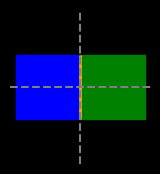

Relationship: Borders


In [ ]:
def borders_simple_example():
    box4_left = shapely.Polygon(box_points(4, offset_x=-2))
    box4_right = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([box4_left])
    b = StructureSlice([box4_right])
    return a, b

a, b = borders_simple_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

## Confines (Interior Borders) 

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Confines</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of 
<span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.

For Interior Borders <span class="b">b</span> 
Should be Within <span class="a">a</span>.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/confines.png" alt="Confines">
<img src="Images/Relationships/confines with island.png" alt="Confines With Island">
</td></tr></table>

**Confines**
 - Sphere within shell
 - Box in box, touching z plane hole surface only
 - Box in box, touching x plane hole surface only
 - concentric shells

In [38]:
# 6 cm x 6 cm box
box6 = shapely.Polygon(box_points(6))
slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5)

# 4 cm x 4 cm box
box4 = shapely.Polygon(box_points(4))
slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)

# 6 cm x 6 cm box offset right by 3 cm
offset_box6 = shapely.Polygon(box_points(6, offset_x=3))
slices_3 = make_contour_slices(roi_num=3, shape=offset_box6, number_slices=5)

# 6 cm x 6 cm box with 4cm x 4 cm hole
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
slices = make_slice_list(5, start=0.2)
slices_4a = make_contour_slices(roi_num=4, shape=box6, number_slices=5,
                                offset_z=0.2)
slices_4b = make_contour_slices(roi_num=4, shape=box4, number_slices=5,
                                offset_z=0.2)

# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
slices_5a = make_contour_slices(roi_num=5, shape=box2a, number_slices=5)
slices_5b = make_contour_slices(roi_num=5, shape=box2b, number_slices=5)

# 2 cm x 2 cm box offset inf by 0.3 cm
slices_6 = make_contour_slices(roi_num=6, shape=offset_box6, number_slices=5,
                               offset_z=-0.3)

# Stacked Boxes
slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5,
                               offset_z=2)
slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5,
                               offset_z=-1.5)


# combine the slice data
slice_data = pd.concat([slices_1, slices_2, slices_3, slices_4a, slices_4b,
                        slices_5a, slices_5b, slices_6, slices_7, slices_8])
# convert slice data into a table of slices and structures
slice_table = make_slice_table(slice_data)

In [39]:
def embedded_boxes_same_start():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = shapely.Polygon(box_points(6))
    slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5)
    # 4 cm x 4 cm box
    box4 = shapely.Polygon(box_points(4))
    slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)
    # combine the contours
    slice_data = pd.concat([slices_1, slices_2, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [40]:
slice_table = embedded_boxes_same_start()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Partition


In [41]:
def overlapping_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = shapely.Polygon(box_points(6))
    slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5,
                                spacing=slice_spacing)
    # 6 cm x 6 cm box offset right by 3 cm
    offset_box6 = shapely.Polygon(box_points(2, offset_x=3))
    # 2 cm x 2 cm box offset inf by 0.3 cm
    slices_6 = make_contour_slices(roi_num=6, shape=offset_box6,
                                   number_slices=5, offset_z=-0.3,
                                spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([slices_1, slices_6, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [42]:
slice_table = overlapping_boxes()
regions = generate_region_graph(slice_table)

selected_roi = [1, 6]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [43]:
def bordering_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # 4 cm x 4 cm box
    box4 = shapely.Polygon(box_points(4))
    slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)
    # 6 cm x 6 cm box with 4cm x 4 cm hole
    box6 = shapely.Polygon(box_points(6))
    box4 = shapely.Polygon(box_points(4))
    slices = make_slice_list(5, start=0.2)
    slices_4a = make_contour_slices(roi_num=4, shape=box6, number_slices=5,
                                    offset_z=0.2)
    slices_4b = make_contour_slices(roi_num=4, shape=box4, number_slices=5,
                                    offset_z=0.2)
    # combine the contours
    slice_data = pd.concat([slices_2, slices_4a, slices_4b, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [44]:
slice_table = bordering_boxes()
regions = generate_region_graph(slice_table)
selected_roi = [4, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Confines


In [45]:
def stacked_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=10, offset_z=-5,
                                spacing=slice_spacing)
    # 4 cm x 4 cm box
    box4 = shapely.Polygon(box_points(4))
    # Stacked Boxes
    slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5, offset_z=0)
    slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5, offset_z=-4)
    # combine the contours
    slice_data = pd.concat([slices_7, slices_8, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [46]:
slice_table = stacked_boxes()
regions = generate_region_graph(slice_table)
selected_roi = [7, 8]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [47]:
def parallel_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1, offset_z=0,
                                  spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    right_middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.5,
                                             offset_x=2.5, offset_z=-0.2,
                                             spacing=slice_spacing)
    left_boundary_cylinder1 = make_vertical_cylinder(roi_num=3, radius=1, length=0.2,
                                             offset_x=-2.5, offset_z=-0.4,
                                             spacing=slice_spacing)
    left_boundary_cylinder2 = make_vertical_cylinder(roi_num=3, radius=1, length=0.2,
                                             offset_x=-2.5, offset_z=0.3,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, left_cylinder, right_cylinder,
                            right_middle_cylinder,
                            left_boundary_cylinder1,left_boundary_cylinder2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


#### Bordering Cylinders
- Identify the boundary slices of the Primary and the neighbouring slice(s) that do not have a primary.
- For each of these neighbouring slices, if the slice has a Secondary contour, select that Secondary slice.

![Bordering cylinders](FreeCAD_Scripts/BorderingCylinders.png)

In [48]:
def bordering_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder1 = make_vertical_cylinder(roi_num=4, radius=3, length=0.2,
                                             offset_x=0, offset_z=-0.5,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder2 = make_vertical_cylinder(roi_num=4, radius=3, length=0.2,
                                             offset_x=0, offset_z=0.4,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, bordering_cylinder1,
                            bordering_cylinder2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


#### Partition Cylinders
- Identify the boundary slices of the Primary and the neighbouring slice(s) that do not have a primary.
- For each of these neighbouring slices, if the slice does not have a Secondary contour, but there is a Secondary contour on the same slice as the Primary boundary, select that Secondary slice.


In [49]:
def partitions_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    # cylinder with interior borders
    partitioning_cylinder = make_vertical_cylinder(roi_num=3, radius=3, length=0.7,
                                             offset_x=0, offset_z=-0.3,
                                             spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, partitioning_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [50]:
slice_table = partitions_cylinder()
regions = generate_region_graph(slice_table)
selected_roi = [1, 3]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Partition


In [51]:
def embedded_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    primary_cylinder = make_vertical_cylinder(roi_num=9, radius=6, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    center_hole = make_vertical_cylinder(roi_num=9, radius=4, length=0.5,
                                         offset_z=-0.2, spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    confines_cylinder = make_vertical_cylinder(roi_num=10, radius=3, length=0.5,
                                             offset_z=-0.2,
                                             spacing=slice_spacing)
    surrounds_cylinder = make_vertical_cylinder(roi_num=11, radius=2, length=0.3,
                                         offset_z=-0.1, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, center_hole,
                            confines_cylinder, surrounds_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


#print(find_relationship(embedded_cylinder(), [9, 10]))


#### Horizontal Cylinders

![Horizontal Cylinders](./Images/FreeCAD%20Images/HorizontalCylinders.png)

In [52]:
def horizontal_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=6, length=6, height=8, offset_z=-4,
                    spacing=slice_spacing)
    cylinder2h = make_horizontal_cylinder(radius=2, length=5, roi_num=1,
                                          spacing=slice_spacing)
    cylinder1h = make_horizontal_cylinder(radius=1, length=5, roi_num=2,
                                          spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cylinder1h, cylinder2h])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [53]:
slice_table = horizontal_cylinders()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Partition


 #### Vertical Concentric Cylinders
 
 ![Concentric Cylinders](./Images/FreeCAD%20Images/ConcentricCylinders.png)

In [54]:
def vertical_concentric_cylinders():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    cylinder6 = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                    spacing=slice_spacing)
    cylinder4 = make_vertical_cylinder(roi_num=2, radius=4, length=10,
                                    spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cylinder6, cylinder4])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [55]:
slice_table = vertical_concentric_cylinders()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Partition


#### Overlaps

In [56]:
def overlapping_cubes_left():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_left = make_box(roi_num=2, width=6, offset_x=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_left])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [57]:
slice_table = overlapping_cubes_left()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [58]:
def overlapping_cubes_inf():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf = make_box(roi_num=3, width=6, offset_z=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_inf])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [59]:
slice_table = overlapping_cubes_inf()
regions = generate_region_graph(slice_table)
selected_roi = [1, 3]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [60]:
def overlapping_cubes_sup():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3_sup = make_box(roi_num=4, width=3, offset_z=-2.5,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube3_sup])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [61]:
slice_table = overlapping_cubes_sup()
regions = generate_region_graph(slice_table)
selected_roi = [1, 4]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [62]:
def overlapping_cubes_inf_rt():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf_rt = make_box(roi_num=5, width=6, offset_z=3, offset_x=3,
                            offset_y=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_inf_rt])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [63]:
slice_table = overlapping_cubes_inf_rt()
regions = generate_region_graph(slice_table)
selected_roi = [1, 5]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [64]:
def dual_embedded_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.5, offset_z=-0.8,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.9,
                                              offset_z=-0.5,
                                              spacing=slice_spacing)
    left_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                       offset_x=-2.5, offset_z=-0.4,
                                       spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                       offset_x=2.5, offset_z=-0.4,
                                       spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.7,
                                             offset_x=2.5, offset_z=-0.4,
                                             spacing=slice_spacing)

    # cylinder completely inside of a hole
    surrounds_cylinder = make_vertical_cylinder(roi_num=3, radius=1, length=0.3,
                                             offset_x=-2.5, offset_z=-0.2,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder1 = make_vertical_cylinder(roi_num=4, radius=3, length=0.2,
                                             offset_x=0, offset_z=-0.7,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder2 = make_vertical_cylinder(roi_num=4, radius=3, length=0.2,
                                             offset_x=0, offset_z=0.4,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, left_hole, right_hole,
                            confines_cylinder, surrounds_cylinder,
                            bordering_cylinder1, bordering_cylinder2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


#### Concentric cylinders starting on the same slice
  
<img src="Images\Boundaries\PartitionSup3D.png" alt="PartitionSup3D" style="height:50px;">
<img src="Images\Boundaries\PartitionSup2D.png" alt="PartitionSup2D" style="height:30px;">

In [65]:
def concentric_cylinders_same_start():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Concentric cylinders starting on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    sup_partition = make_vertical_cylinder(roi_num=2, radius=1, length=0.4,
                                           offset_z=-0.3,
                                           spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, sup_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [66]:
slice_table = concentric_cylinders_same_start()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

D:\OneDrive - Queen's University\Python\Projects\StructureRelations\src\structure_set.py:109: UserWarning: ROI 1 has a isolated contour on slice -0.65
  warn(f'ROI {node["roi"]} has a isolated contour on slice {this_slice}')
D:\OneDrive - Queen's University\Python\Projects\StructureRelations\src\structure_set.py:109: UserWarning: ROI 0 has a isolated contour on slice -0.6
  warn(f'ROI {node["roi"]} has a isolated contour on slice {this_slice}')
D:\OneDrive - Queen's University\Python\Projects\StructureRelations\src\structure_set.py:109: UserWarning: ROI 1 has a isolated contour on slice -0.55
  warn(f'ROI {node["roi"]} has a isolated contour on slice {this_slice}')
D:\OneDrive - Queen's University\Python\Projects\StructureRelations\src\structure_set.py:109: UserWarning: ROI 0 has a isolated contour on slice -0.5
  warn(f'ROI {node["roi"]} has a isolated contour on slice {this_slice}')
D:\OneDrive - Queen's University\Python\Projects\StructureRelations\src\structure_set.py:109: UserWarn

ValueError: Must supply either StructureSlices or a relationship string to create a DE27IM object.

#### Concentric cylinders ending on the same slice.

<img src="Images\Boundaries\PartitionInf3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="Images\Boundaries\PartitionInf2D.png" alt="PartitionInf2D" style="height:30px;">

In [30]:
def concentric_cylinders_same_end():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Concentric cylinders ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    inf_partition = make_vertical_cylinder(roi_num=3, radius=1, length=0.4,
                                           offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, inf_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [31]:
slice_table = concentric_cylinders_same_end()
selected_roi = [1, 3]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


#### Concentric cylinders starting and ending on the same slice.

<img src="Images\Boundaries\Partition3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="Images\Boundaries\Partition2D.png" alt="PartitionInf2D" style="height:30px;">

In [32]:
def concentric_cylinders_same_start_end():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Concentric cylinders starting and ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    mid_partition = make_vertical_cylinder(roi_num=4, radius=1, length=0.7,
                                           offset_z=-0.3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, mid_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [33]:
slice_table = concentric_cylinders_same_start_end()
selected_roi = [1, 4]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


### Exterior Borders
  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF cylinders in one structure with single slice gap at the SUP/INF boundary of the central cylinder.

      
![Exterior Border SUP](Images/Boundaries/ExteriorBorders2D_SUP.png)
![Exterior Border INF](Images/Boundaries/ExteriorBorders2D_INF.png)

In [34]:
def concentric_cylinders_inf_offset():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    primary_cylinder = make_vertical_cylinder(roi_num=5, radius=2, length=0.4,
                                              offset_z=-0.4,
                                              spacing=slice_spacing)
    inf_cylinder = make_vertical_cylinder(roi_num=6, radius=1, length=0.4,
                                          offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, inf_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [35]:
slice_table = concentric_cylinders_inf_offset()
selected_roi = [5, 6]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Borders


#### Confines Cylinders
- Identify the boundary slices of the Primary and the neighbouring slice(s) that do not have a primary.
- For each of these neighbouring slices, if the slice does not have a Secondary contour, but there is a Secondary contour on the same slice as the Primary boundary, select that Secondary slice.

  
![Confines cylinder](FreeCAD_Scripts/confines_cylinder.png)



5. Match hole boundary slices for boundary tests:
   - For each hole boundary slice of the Primary ROI, if the slice has a Secondary contour, select that contour for comparison.
   - If the slice does not have a Secondary contour, identify the neighbouring slice that also has a hole.
   - If the neighbouring slice has a Secondary contour, select that contour.
   - If the neighbouring slice does not have a Secondary contour, boundary testing is not required.


  

In [ ]:
def confines_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    left_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.5,
                                       offset_x=-2.5, offset_z=-0.2,
                                       spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.5,
                                       offset_x=2.5, offset_z=-0.2,
                                       spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.5,
                                             offset_x=2.5, offset_z=-0.2,
                                             spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, left_hole, right_hole,
                            confines_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


### Interior Borders
  - Primary: Central Cylinder
  - Concentric shorter hole in the center of the primary cylinder
  - Secondary same height as hole but narrower
  - Interior borders at the and bottom of hole.
  
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
def embedded_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    primary_cylinder = make_vertical_cylinder(roi_num=9, radius=4, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    center_hole = make_vertical_cylinder(roi_num=9, radius=2, length=0.5,
                                         offset_z=-0.2, spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    middle_cylinder = make_vertical_cylinder(roi_num=10, radius=1, length=0.5,
                                             offset_z=-0.2,
                                             spacing=slice_spacing)
    reference = make_vertical_cylinder(roi_num=11, radius=2, length=0.5,
                                         offset_z=-0.2, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, center_hole, middle_cylinder, reference])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [ ]:
def overlapping_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    # cylinder with interior borders
    overlapping_cylinder = make_vertical_cylinder(roi_num=5, radius=3, length=0.9,
                                             offset_x=0, offset_z=-0.3,
                                             spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, overlapping_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [ ]:
def cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1,
                                  offset_z=-0.5,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    # cylinder within primary
    contained_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=0.5,
                                             offset_x=0, offset_z=-0.2,
                                             spacing=slice_spacing)
    # cylinder with matching borders
    partitioning_cylinder = make_vertical_cylinder(roi_num=3, radius=3, length=0.7,
                                             offset_x=0, offset_z=-0.3,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder1 = make_vertical_cylinder(roi_num=4, radius=3, length=0.2,
                                             offset_x=0, offset_z=-0.5,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder2 = make_vertical_cylinder(roi_num=4, radius=3, length=0.2,
                                             offset_x=0, offset_z=0.4,
                                             spacing=slice_spacing)
    # cylinder overlapping positive
    overlapping_cylinder = make_vertical_cylinder(roi_num=5, radius=3, length=0.8,
                                             offset_x=0, offset_z=-0.3,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, contained_cylinder,
                            partitioning_cylinder,
                            bordering_cylinder1, bordering_cylinder2,
                            overlapping_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [38]:
def overlapping_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=5, offset_z=-3,
                                spacing=slice_spacing)
    # overlapping boxes
    cube4_sup = make_box(roi_num=1, width=2, offset_z=-1, spacing=slice_spacing)
    cube4_inf = make_box(roi_num=2, width=2, offset_z= .5, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube4_sup, cube4_inf])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [39]:
slice_table = overlapping_boxes()
selected_roi = [1, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


Boxes are overlapping because they have a contour on the same slice (-0.5)

In [40]:
def has_contour(slice):
    if isinstance(slice, StructureSlice):
        return 'contour'
    return ''

slice_table = overlapping_boxes()
slices = slice_table.map(has_contour)
slices.columns = ['Body', 'Sup Box', 'Inf Box']
slices

,Body,Sup Box,Inf Box
Slice Index,,,
-3.0,contour,,
-2.5,contour,,
-2.0,contour,contour,
-1.5,contour,contour,
-1.0,contour,contour,
-0.5,contour,contour,contour
0.0,contour,,contour
0.5,contour,,contour
1.0,contour,,contour


# More Tests Needed

  - Single Primary slice with circular contour.
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF Cylinders in one structure with single slice gap at level of the primary slice. 
- 
**Partition**
  - Concentric cylinders ending on the same slice.
  - Concentric cylinders starting on the same slice
  - Primary: Central Cylinder
    - Single Secondary slice with circular contour on the SUP/INF slice of the Primary cylinder.
  - Single Primary slice with circular contour
    - Secondary: one of:
      - SUP Cylinder ending on the same slice.
      - INF Cylinder ending on the same slice.


**OVERLAPS**
  - Concentric cylinders with interior cylinder ending outside the exterior cylinder by one slice
  - Concentric cylinders with interior cylinder consisting of single slice ending inside the exterior cylinder by one slice


In [ ]:
    # 6 cm x 6 cm box offset right by 3 cm
    offset_box6 = shapely.Polygon(box_points(6, offset_x=3))
    slices_3 = make_contour_slices(roi_num=3, shape=offset_box6, number_slices=5)



# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
slices_5a = make_contour_slices(roi_num=5, shape=box2a, number_slices=5)
slices_5b = make_contour_slices(roi_num=5, shape=box2b, number_slices=5)



# Stacked Boxes
slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5,
                               offset_z=2)
slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5,
                               offset_z=-1.5)


# combine the slice data
slice_data = pd.concat([slices_1, slices_2, slices_3, slices_4a, slices_4b,
                        slices_5a, slices_5b, slices_6, slices_7, slices_8])
# convert slice data into a table of slices and structures
slice_table = make_slice_table(slice_data)

In [ ]:
# 6 cm x 6 cm box
box6 = shapely.Polygon(box_points(6))
slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5)

# 4 cm x 4 cm box
box4 = shapely.Polygon(box_points(4))
slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)

# 6 cm x 6 cm box offset right by 3 cm
offset_box6 = shapely.Polygon(box_points(6, offset_x=3))
slices_3 = make_contour_slices(roi_num=3, shape=offset_box6, number_slices=5)

# 6 cm x 6 cm box with 4cm x 4 cm hole
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
slices = make_slice_list(5, start=0.2)
slices_4a = make_contour_slices(roi_num=4, shape=box6, number_slices=5,
                                offset_z=0.2)
slices_4b = make_contour_slices(roi_num=4, shape=box4, number_slices=5,
                                offset_z=0.2)

# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
slices_5a = make_contour_slices(roi_num=5, shape=box2a, number_slices=5)
slices_5b = make_contour_slices(roi_num=5, shape=box2b, number_slices=5)

# 2 cm x 2 cm box offset inf by 0.3 cm
slices_6 = make_contour_slices(roi_num=6, shape=offset_box6, number_slices=5,
                               offset_z=-0.3)

# Stacked Boxes
slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5,
                               offset_z=2)
slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5,
                               offset_z=-1.5)


# combine the slice data
slice_data = pd.concat([slices_1, slices_2, slices_3, slices_4a, slices_4b,
                        slices_5a, slices_5b, slices_6, slices_7, slices_8])
# convert slice data into a table of slices and structures
slice_table = make_slice_table(slice_data)

  - Single Primary slice with circular contour.
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF Cylinders in one structure with single slice gap at level of the primary slice. 
- 
**Partition**
  - Concentric cylinders ending on the same slice.
  - Concentric cylinders starting on the same slice
  - Primary: Central Cylinder
    - Single Secondary slice with circular contour on the SUP/INF slice of the Primary cylinder.
  - Single Primary slice with circular contour
    - Secondary: one of:
      - SUP Cylinder ending on the same slice.
      - INF Cylinder ending on the same slice.

**OVERLAPS**
  - Concentric cylinders with interior cylinder ending outside the exterior cylinder by one slice
  - Concentric cylinders with interior cylinder consisting of single slice ending inside the exterior cylinder by one slice


  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF cylinders in one structure with single slice gap at the SUP/INF boundary of the central cylinder.
  - Single Primary slice with circular contour.
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF Cylinders in one structure with single slice gap at level of the primary slice. 
